# FAIR metrics - NBIA in Gene Express Omnibus (GEO)

by [Serena Bonaretti](https://sbonaretti.github.io), Maastricht University

**Use-case: A researcher wants to know the function of the protein WDR45 in the brain from Gene Expression Omnibus (GEO). Data searched are related to NBIA (neurodegeneration with brain iron accumulation)**  
- *Data*:    
- *Metadata*: 
- *Repository*: 

User interface for data and metadata: 

Characteristics of the GEO API: 
- Documentation at https://www.ncbi.nlm.nih.gov/geo/info/geo_paccess.html
- The API to query the database is a rest API: 
  - Output format: ?
- The API to get data is an FTP API: 
  - Output format: ? 
- It provides 5 possible operations for query (https://www.ncbi.nlm.nih.gov/books/NBK25499/#chapter4), which return:  
  - eSearch: results of a search   
    (base URL: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi)  
  - eSummary: document summary   
    (base URL: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esummary.fcgi)   
  - eFetch: formatted data records  
    (base URL: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi)
  - eLink: links to same or different databases   
    (base URL: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi)
  - eInfo: statistics for a single database, including lists of indexing fields and available link names  
    (base URL: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/einfo.fcgi)


Other characteristics:  
- 

---

### Calculating FAIR metrics

[FAIR metrics:](#metrics) 
- [F1. (Meta)data are assigned a globally unique and persistent identifier](#F1) 
- [F2. Data are described with rich metadata](#F2) 
- [F3. Metadata clearly and explicitly include the identifier of the data it describes](#F3)  
- [F4. (Meta)data are registered or indexed in a searchable resource](#F4) 
- [A1. (Meta)data are retrievable by their identifier using a standardized communications protocol](#A1)    
- [A2. Metadata are accessible, even when the data are no longer available](#A2)  
- [I1. (Meta)data use a formal, accessible, shared, and broadly applicable language for knowledge representation](#I1) 
- [I2. Metadata use vocabularies that follow FAIR principles](#I2)  
- [I3. (Meta)data include qualified references to other (meta)data](#I3)   
- [R1.1. (Meta)data are released with a clear and accessible data usage license](#R11)  
- [R1.2. (Meta)data are associated with detailed provenance](#R12)  
- [R1.3. (Meta)data meet domain-relevant community standards](#R13)

[FAIR metric indicator](#indicator)

---

Imports:

In [1]:
import os
import pandas as pd
import requests
import xml.etree.ElementTree as ET

Import R for graph:

In [2]:
# use R to create the plot using ggplot2
os.environ['R_HOME'] = '/Library/Frameworks/R.framework/Resources' # put here your own R directory
%load_ext rpy2.ipython

Variables:

In [3]:
#query_string    = "nbia AND homo sapiens AND expression profiling by array"
repository_name    = 'Gene Expression Omnibus' 
#repository_url  = 'https://www.ncbi.nlm.nih.gov/geo/'
#repository_api  = 'ftp://ftp.ncbi.nlm.nih.gov/geo/'
repository_api     = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?"
metadata_api       = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esummary.fcgi?"
repository_acronym = "gds" # gene dataset

#google_search  = 'https://google.com/search?q='
re3data_repos  = "https://www.re3data.org/api/v1/repositories"
re3data_repo   = "https://www.re3data.org/api/v1/repository"
re3data_schema = '{http://www.re3data.org/schema/2-2}' # in the metadata xml

# keywords to search dataset
keywords = []
keywords.append("nbia")
keywords.append("homo sapiens")
keywords.append("expression profiling by array")
query_string = keywords[0] +  " AND " + keywords[1] + " AND " + keywords[2]



Functions: 

In [4]:
def look_for_tag_re3data (root, schema, characteristic):
    
    ''' 
    It extract text corresponding to provided tag in re3data
    '''
    
    # look for content
    text = []

    for i in range (0, len(root[0])):

        # tag
        tag  = root[0][i].tag
        tag  = tag.replace(schema, "")

        if tag == characteristic:            
            if len(root[0][i]) == 0:
                text.append(root[0][i].text)
            else:
                for a in range (0, len(root[0][i])):
                    tag  = root[0][i][a].tag
                    tag  = tag.replace(schema, "") # to improve redeability
                    text.append(root[0][i][a].text)

    return text

In [5]:
def pretty_print_xml (root): 
    '''
    It prints xml with identations
    '''
    
    count = 0
    for i in range (0, len(root)):

        if len(root[i]) == 0:
            print ("<"  + str(root[i].tag) + ">")
            print ("   " + str(root[i].text))
            count = count + 1
        else: 
            for j in range(0, len(root[i])):
                if len(root[i][j]) == 0:
                    print ("<"  + str(root[i][j].tag) + ">")
                    print ("   " + str(root[i][j].text))
                    print ("<"  + str(root[i][j].tag + ">"))
                    count = count + 1
                else: 
                    for k in range (0, len(root[i][j])):
                        print ("  <"  + str(root[i][j][k].tag + ">"))
                        print ("      " + str(root[i][j][k].text))
                        count = count + 1
    return count


Extract metadata from database:

In [31]:
# query repository
r_repo = requests.get(repository_api,
                  params={"db"   : repository_acronym,
                          "term" : query_string})
#print (r_repo.text)

# convert answer from string to xml_tree
root = ET.fromstring(r_repo.text)

#pretty_print_xml (root)

In [33]:
# get identifier
for field in root.iter('Id'):
    id = field.text

# get metadata
r_meta = requests.get(metadata_api,
                  params={"db" : repository_acronym,
                          "id" : id})
root_meta = ET.fromstring(r_meta.text)
metadata  = root_meta[0]
# pretty_print_xml (metadata)

---

<a name="metrics"></a>
### FAIR metrics

---

<a name="F1"></a>
#### F1. (Meta)data are assigned a globally unique and persistent identifier
*Assumption*: Data and metadata have the same identifier

In [8]:
print ("id: " + str(id))

if id == None:
    # there is no identifier 
    F1 = 0
elif id.find("doi") != -1:
    # doi is a globally unique and persistent identifier 
    F1 = 1
else:
    # indentifiers exist but it is not globally unique and persistent
    F1 = 0.5

print ("--> F1: " + str(F1) )

id: 200070433
--> F1: 0.5


---

<a name="F2"></a>
#### F2. Data are described with rich metadata 

The metadata related to findability are the keywords used in the query:   

```
<Item Name="taxon" Type="String">Homo sapiens; Mus musculus</Item>
<Item Name="gdsType" Type="String">Expression profiling by array</Item>

```

In [9]:
# counter 
findability = 0

# look for publication authors, title, and email of corresponding author 
for i in range (0, len(metadata)):
    
    # nbia
    if str(metadata[i].text).lower().find(keywords[0]) != -1:
        print ("Keyword: " + str(metadata[i].text))
        findability = findability + 1
    
    # homo sapiens
    if str(metadata[i].text).lower().find(keywords[1]) != -1:
        print ("Keyword: " + str(metadata[i].text))
        findability = findability + 1

    
    # experiment type
    if str(metadata[i].text).lower().find(keywords[2]) != -1:
        print ("Keyword: " + str(metadata[i].text))
        findability = findability + 1

# assign F2
if findability == 0:           # none of the search keywords are in the metafile data
    F2 = 0
else:
    F2 = findability/len(keywords)

print ("")
print ("Total number of keywords in search: " + str(len(keywords)))
print ("Total number of keywords found in metadata: " + str(findability))
print ("--> F2: " + "{:.2f}".format(F2))

Keyword: Homo sapiens; Mus musculus
Keyword: Expression profiling by array

Total number of keywords in search: 3
Total number of keywords found in metadata: 2
--> F2: 0.67


---

<a name="F3"></a>
#### F3. Metadata clearly and explicitly include the identifier of the data it describes   

In [10]:
# find unique identifier
for i in range (0, len(metadata)):
    if metadata[i].tag == "Id":
        identifier = metadata[i].text
        print ("identifier: " + str(identifier))

# assign value to F1
if identifier.isdigit():
    F3 = 1
else:
    F3 = 0
print ("--> F3: " + str(F3) )

identifier: 200070433
--> F3: 1


---

<a name="F4"></a>
#### F4. (Meta)data are registered or indexed in a searchable resource

Search for repository in the registry www.re3data.org 

In [11]:
# contact the registry
re3data_r = requests.get(re3data_repos)
# put output string in a structured xml tree
re3data_root = ET.fromstring(re3data_r.text)

# look for the wanted repository
flag = 0
for i in range (0, len(re3data_root)):
    if re3data_root[i][1].text == repository_name: # first index is a <repository> group, 
                                           # second index is for the tags inside (<id>, <name>, <link>)
        flag = 1
        repository_index = i
        
if flag == 1:        
    F4 = 1
    print ("Index in list: " + str(repository_index))
    print ("Tag          : " + str(re3data_root[repository_index][1].tag))
    print ("Text         : " + str(re3data_root[repository_index][1].text))
    print ("Tag          : " + str(re3data_root[repository_index][2].tag))
    print ("Attribute    : " + str(re3data_root[repository_index][2].attrib)) # attributes do not have a closing tag

    re3data_metadata = str(re3data_root[repository_index][2].attrib["href"])
    print ("Database metadata are in: " + str(re3data_metadata))
else: 
    F4 = 0
    print ("Repository not found")

print ("--> F4: " + str(F4))

Index in list: 249
Tag          : name
Text         : Gene Expression Omnibus
Tag          : link
Attribute    : {'href': '/api/v1/repository/r3d100010283', 'rel': 'self'}
Database metadata are in: /api/v1/repository/r3d100010283
--> F4: 1


---

<a name="A1"></a>
#### A1. Metadata are retrievable by their identifier using a standardized communications protocol   
**A1.1 the protocol is open, free, and universally implementable**   
**A1.2 the protocol allows for an authentication and authorization procedure, where necessary**  

In [12]:
if r_repo.status_code == 200:
    A1 = 1 
else:
    print ("protocols different from HTTP not evaluated yet")
print ("--> A1: " + str(A1))     

--> A1: 1


---

<a name="A2"></a>
#### A2. Metadata are accessible, even when the data are no longer available  
*Interpretation:* If metadata do not have a unique identifier, there is no guarantee that they are accessible in the future 

In [13]:
print ("TBD")
if identifier != []:
    A2 = 1
else:
    A2 = 0
print ("--> A2: " + str(A2))    

TBD
--> A2: 1


---

<a name="I1"></a>
#### I1. Metadata use a formal, accessible, shared, and broadly applicable language for knowledge representation  

In [14]:
# GE0 provides metadata in XLM format using its specific schema: 
# https://www.ebi.ac.uk/arrayexpress/help/programmatic_access.html#Format_XML_results
# (https://www.ebi.ac.uk/arrayexpress/help/programmatic_access.html)
print ("TBD")
I1 = 0.5 # manual assignment
print ("--> I1: " + str(I1))   

TBD
--> I1: 0.5


---

<a name="I2"></a>
#### I2. Metadata use vocabularies that follow FAIR principles

In [15]:
I2 = None

---

<a name="I3"></a>
#### I3. (Meta)data include qualified references to other (meta)data  
*Interpretation for this user-case*: (for enano mapper 

In [29]:
I3 = None

link_api       = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?"
r_link = requests.get(link_api,
                  params={"db" : repository_acronym,
                          "id" : id})
print (r_link.text)
# root_link = ET.fromstring(r_link.text)
# link  = root_link[0]
# pretty_print_xml (root_link)




<?xml version="1.0" encoding="UTF-8" ?>
<!DOCTYPE eSearchResult PUBLIC "-//NLM//DTD esearch 20060628//EN" "https://eutils.ncbi.nlm.nih.gov/eutils/dtd/20060628/esearch.dtd">
<eSearchResult>
	<ERROR>Empty term and query_key - nothing todo</ERROR>
</eSearchResult>



---

<a name="R1"></a>
#### R1 (meta)data are richly described with a plurality of accurate adn relevant attributes

In [17]:
R1 = None

---

<a name="R11"></a>
#### R1.1. Metadata are released with a clear and accessible data usage license  

Assumption: License stated in re3data.org

In [18]:
# extract repository number 
repository_number = re3data_metadata[re3data_metadata.rfind('/') : len(re3data_metadata)]

# metadata_url
metadata_url      = re3data_repo + str(repository_number)

# access the repository metadata 
re3data_repo_r = requests.get(metadata_url)

# put the r_repo string in a structured xml tree
re3data_repo_root = ET.fromstring(re3data_repo_r.text)

In [19]:
output = look_for_tag_re3data (re3data_repo_root, re3data_schema, 'dataLicense')
print (output)
if output[1] != []:
    R11 = 1 
else: 
    R11 = 0
print ("R11: " + str(R11)) 

['Copyrights', 'http://www.ncbi.nlm.nih.gov/geo/info/disclaimer.html']
R11: 1


<a name="R12"></a>
#### R1.2. (Meta)data are associated with detailed provenance  
See https://blog.datacite.org/exposing-doi-metadata-provenance/ with DOI https://doi.org/10.5438/wy92-xj57

In [20]:
# find author name and publication and email address

In [21]:
R12 = 1 # to be improved

<a name="R13"></a>
#### R1.3. (Meta)data meet domain-relevant community standards

In [22]:
R13 = None

---
---

<a name="indicator"></a>
### FAIR indicator - Visualization

In [23]:
metric_values = [ F1,   F2,   F3,   F4,   A1,   A2,   I1,   I2,   I3,   R1,   R11,   R12,   R13 ]
data = {
        "metric_values": metric_values,
       }
df = pd.DataFrame (data)

# display
pd.set_option("display.max_rows",df.shape[0])
df

,metric_values
0,0.500000
1,0.666667
2,1.000000
3,1.000000
4,1.000000
5,1.000000
6,0.500000
7,NaN
8,NaN
9,NaN


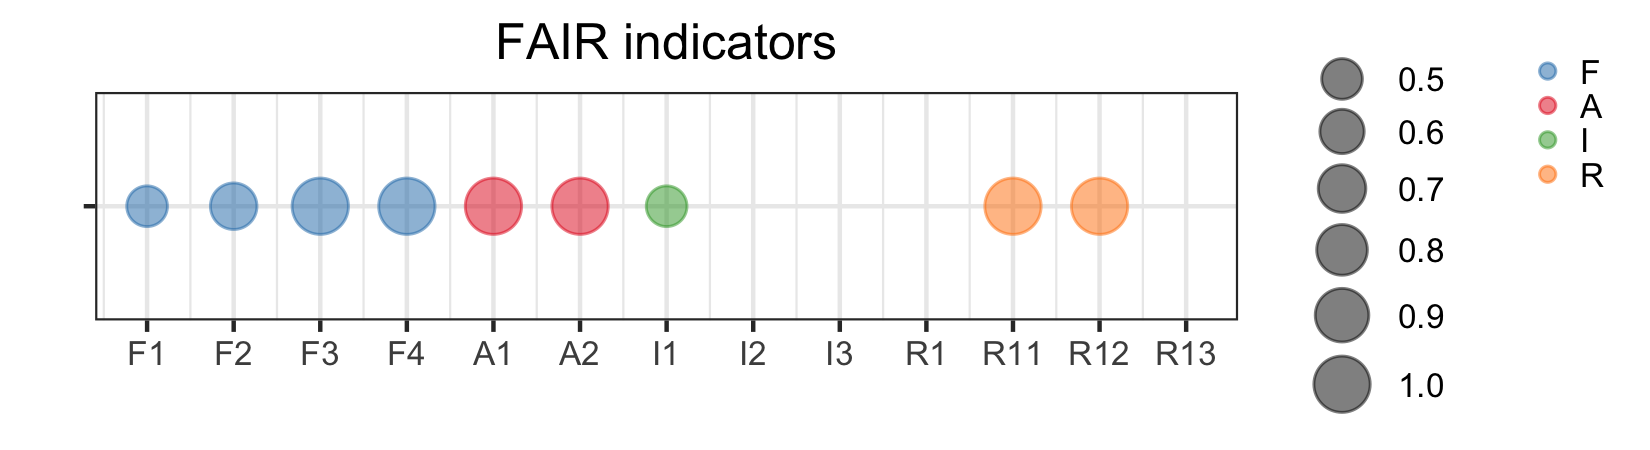

In [28]:
%%R -i df -w 5.5 -h 1.5 --units in -r 300 

library(ggplot2)

title_text_size <- 12
axis_text_size  <- 10
tick_text_size  <- 8

# variables
metric_names <- c("F1", "F2", "F3", "F4", "A1", "A2", "I1", "I2", "I3", "R1", "R11", "R12", "R13" )
x_values     <- rep(1, length(metric_names))
y_values     <- seq(1, length(metric_names))
y_values     <- sort(y_values, decreasing = TRUE)
point_color  <- c("F",  "F",  "F",  "F",  "A",  "A",  "I",  "I",  "I",  "R",  "R",   "R",   "R"  )

pl <- ggplot(data=df, aes(x=x_values, y=y_values, color=point_color, size=metric_values))+
        # points
        geom_point(alpha=0.5) +
        scale_size_area() + 
        # background
        theme_bw() + 
        # flip x and y
        coord_flip()  +
        # axis ticks (x and y flipped)
        scale_x_continuous(limits=c(0,2),   breaks=seq(1,1,0),   labels="") + 
        scale_y_reverse   (limits=c(13, 1), breaks=seq(13,1,-1), labels=metric_names) + 
        theme(axis.text.x = element_text(size = tick_text_size)) + 
        theme(axis.text.y = element_text(size = tick_text_size)) +
        # axis text
        xlab ("") +
        ylab ("") +
        theme(text = element_text( size = axis_text_size )) + 
        # change colors
        scale_color_manual(values=c("#e31a1c", "#1f78b4", "#33a02c", "#ff7f00"),
                         labels = c("F", "A", "I", "R"),
                         breaks = c("F", "A", "I", "R")
                         ) +  
        # title
        ggtitle("FAIR indicators") +
        theme(plot.title = element_text(size = title_text_size, hjust = 0.5))  +
        # legend - colors
        theme(legend.text = element_text(size=tick_text_size),
              legend.key.size = unit(0.2, "cm")) + 
        labs(color="") +  # no legend title   
        labs(size="")  +  # no legend title
        theme(legend.box = "horizontal") 
        

# display
pl

---


## Dependencies 

In [25]:
%reload_ext watermark
%watermark -v -m -p zeep

CPython 3.7.3
IPython 7.4.0

zeep 3.3.1

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 17.7.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


In [27]:
%%R
sessionInfo()

R version 3.3.3 (2017-03-06)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS  10.13.6

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] ggplot2_3.1.0

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.1       digest_0.6.18    withr_2.1.2      crayon_1.3.4    
 [5] dplyr_0.8.1      assertthat_0.2.1 grid_3.3.3       plyr_1.8.4      
 [9] R6_2.4.0         gtable_0.2.0     magrittr_1.5     scales_1.0.0    
[13] pillar_1.4.0     rlang_0.3.4      lazyeval_0.2.1   labeling_0.3    
[17] glue_1.3.1       purrr_0.3.2      munsell_0.5.0    pkgconfig_2.0.2 
[21] colorspace_1.3-2 tidyselect_0.2.5 tibble_2.1.1    


In [26]:
import datetime
now = datetime.datetime.now()
print ("Date: " + str(now.day) + " " + str(now.month) + " " + str(now.year))

Date: 24 6 2019


---